In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# les arrays sont batis avec les dimensions suivantes :
# pluie, arroseur, watson, holmes
# et chaque dimension: faux, vrai

prob_pluie = np.array([0.8, 0.2]).reshape(2, 1, 1, 1)
print("Pr(Pluie)={}\n".format(np.squeeze(prob_pluie)))

prob_arroseur = np.array([0.9, 0.1]).reshape(1, 2, 1, 1)
print("Pr(Arroseur)={}\n".format(np.squeeze(prob_arroseur)))

watson = np.array([[0.8, 0.2], [0, 1]]).reshape(2,1,2,1)
print("Pr(Watson|Pluie)={}\n".format(np.squeeze(watson)))

Pr(Pluie)=[0.8 0.2]

Pr(Arroseur)=[0.9 0.1]

Pr(Watson|Pluie)=[[0.8 0.2]
 [0.  1. ]]



In [3]:
holmes = np.array([[1, 0],[0.1, 0.9],[0, 1],[0, 1]]).reshape(2, 2, 1, 2)
print("Pr(Holmes|Pluie,arroseur)={}\n".format(np.squeeze(holmes)))

Pr(Holmes|Pluie,arroseur)=[[[1.  0. ]
  [0.1 0.9]]

 [[0.  1. ]
  [0.  1. ]]]



In [4]:
watson[0,:,1,:] # prob watson mouille − pluie

array([[0.2]])

In [5]:
(watson * prob_pluie).sum(0).squeeze()[1] # prob gazon watson mouille

0.36000000000000004

In [6]:
holmes[0, 1, 0, 1] # prob gazon holmes mouille si arroseur − pluie

0.9

In [7]:
print("Pr(W = 1) = {}\n".format(np.squeeze((watson * prob_pluie).sum(0).squeeze()[1])))
print("Pr(W = 1|H = 1) = {}\n".format((prob_pluie * prob_arroseur * watson * holmes)[:,:,1,1].sum()/(prob_pluie * prob_arroseur * watson * holmes)[:,:,:,1].sum()))
print("Pr(W = 1|H = 1, A = 0) = {}\n".format((prob_pluie * prob_arroseur * watson * holmes)[:,0,1,1].sum()/(prob_pluie * prob_arroseur * watson * holmes)[:,0,:,1].sum()))
print("Pr(W = 1|A = 0) = {}\n".format((prob_pluie * prob_arroseur * watson * holmes)[:,0,1,:].sum()/(prob_pluie * prob_arroseur * watson * holmes)[:,0,:,:].sum()))
print("Pr(W = 1|P = 1) = {}\n".format((prob_pluie * prob_arroseur * watson * holmes)[1,:,1,:].sum()/(prob_pluie * prob_arroseur * watson * holmes)[1,:,:,:].sum()))

Pr(W = 1) = 0.36000000000000004

Pr(W = 1|H = 1) = 0.7882352941176471

Pr(W = 1|H = 1, A = 0) = 1.0

Pr(W = 1|A = 0) = 0.36000000000000004

Pr(W = 1|P = 1) = 1.0



## 2.2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

X = digits.data
y = digits.target

In [9]:
y_one_hot = np.zeros((y.shape[0], len(np.unique(y))))
y_one_hot[np.arange(y.shape[0]), y] = 1 # one hot target or shape NxK


X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)

X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [10]:
W = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1])) # weights of shape KxL

best_W = None
best_accuracy = 0
lr = 0.001
nb_epochs = 50
minibatch_size = len(y) // 20

losses = []
accuracies = []

def softmax(x): # definition taken from the book (p.397)
    temp = np.exp(x-x.max(0)) # Substract the maximum value doesn't alter the result and ensures numerical stability
    return temp/temp.sum(0)

# softmax(np.array([10, 100, 1000, 10000]))

def get_accuracy(X, y, W):
    y_hat_one_hot = softmax(W @ X.T) # Finding, for each image, the probability that it belongs to each class
    y_hat = np.argmax(y_hat_one_hot, axis=0) # Classifying the image with the most probable class according to the softmax
    y_class = np.argmax(y, axis=1) # Correct classes for each image in the set
    return np.sum(y_class == y_hat)/y.shape[0] # Correctly classified images / Total number of images in the set

def get_grads(y, y_pred, X):
    return y.T @ X - y_pred.T @ X # Definition of the gradient of the log-conditional-likelihood given in the assignment

def get_loss(y, y_pred):
    return np.mean(-y*np.log(y_pred.T), axis=0)

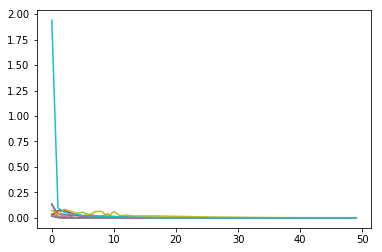

In [11]:
for epoch in range(nb_epochs):
    loss = 0
    accuracy = 0
    for i in range(0 , X_train.shape[0], minibatch_size):
        y_pred = softmax(W @ X_train[i:i+minibatch_size,:].T).T
        grads = get_grads(y_train[i:i+minibatch_size], y_pred, X_train[i:i+minibatch_size])
        W = W + lr*grads
    loss = get_loss(y_train, softmax(W @ X_train.T))
    losses.append(loss) # compute the loss on the train set
    accuracy = get_accuracy(X_validation, y_validation, W)
    accuracies.append(accuracy) # compute the accuracy on the validation set
    if accuracy > best_accuracy:
        best_W = W  # select the best parameters based on the validation accuracy

plt.plot(losses)
plt.show()

In [12]:
accuracy_on_unseen_data = get_accuracy(X_test, y_test, best_W)
print(accuracy_on_unseen_data) # 0.897506925208

0.9703703703703703


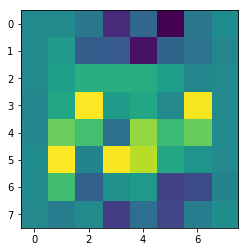

In [13]:
plt.imshow(best_W[4, :].reshape(8,8))